<a href="https://colab.research.google.com/github/DeepthiManthapuram/Machine_learning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.Data Collection
import seaborn as sns

# Load the tips dataset
df = sns.load_dataset('tips')

# Display the first few rows
df.head()
#2.understanding the dataset
df.info()

#total_bill ------->X i/p
#tip -------->Y o/p

#3.stats sum
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


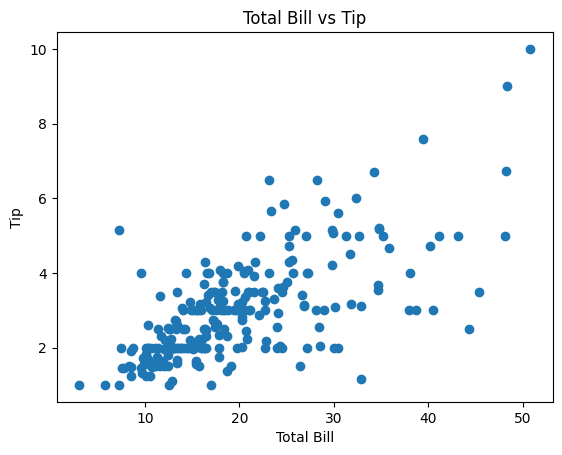

In [2]:
#4.relationship check
#Before using any model,we must confirm relationship..?
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

#observations: (a)as the bill increases tip increases
              #(b)realtionship is straight line we can apply liear regression

In [3]:
#4.Feature & Target Separation
#i/p is always must be in the 2D format
x = df[["total_bill"]] #Feature i/p 2d only
y=df["tip"] #Feature o/p id

#5.Train-Test Split
#why..? model must perform well on unseen data
#how? in sklearn we have a library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size = 0.2, #20% of data is used for testing
    random_state = 42 #out of the 80% of data 42 data points randomly taken
)

#80% ----->training
#20% ----->testing





In [4]:

#6.Feature Standardization
#why..?data to be on same scale
#1.Compare the Co-efficients fairly
#2.Avoid the Dominance of large values
#3.Preapre for Ridge/Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) #applied on training part(calculating sd and mean of particular data)
x_test_scaled = scaler.transform(x_test) #applied on testing part (use just sd and mean and not going to use fit tranform so that it prevent the data leakage)

#Imp:
#1.Fit only on training data
#2.Prevents the data leakage

#7.Train Linear regression model
from sklearn.linear_model import LinearRegression
#just using fit
model = LinearRegression()
model.fit(x_train_scaled,y_train)

print("Co-efficient (m) : ",model.coef_[0])
print("Intercept (c) : ",model.intercept_)

Co-efficient (m) :  0.9357171400271826
Intercept (c) :  3.0877948717948724


R2 score:  0.5449381659234664
MSE :  0.5688142529229538


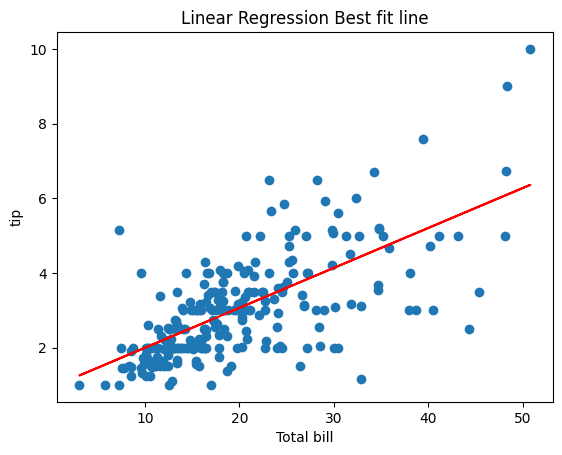

In [5]:
y_pred = model.predict(x_test_scaled)
#8.Model Evaluation

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("R2 score: ", r2)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE : ", mse)

#9.Visualize the Best fit line

plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color = "red")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.title("Linear Regression Best fit line")
plt.show()




In [6]:
#10.INput - Output Real time
bill_amount = float(input("Enter the bill amount: "))
bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)

print(f"Predicted Tip: {predict_tip[0] : .2f}")

Predicted Tip:  482.26


c:\Users\deept\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
